In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [56]:
df=pd.read_csv("housingds.csv")
df.head()

,UniqueId,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,OwnerSplitAddress,OwnerSplitState,OwnerSplitCity
0,43076,025 07 0 031.00,SINGLE FAMILY,179900,20160120-0005776,No,"COSTNER, FRED & CAROLYN",0.96,CITY OF GOODLETTSVILLE,30000.0,70000.0,100000.0,1964.0,3.0,1.0,0.0,2016-01-15,410 ROSEHILL CT,TN,GOODLETTSVILLE
1,39432,026 01 0 069.00,VACANT RESIDENTIAL LAND,153000,20151028-0109602,No,"SHACKLEFORD, MICHAEL C., JR.",0.17,CITY OF GOODLETTSVILLE,21100.0,121600.0,142700.0,2015.0,3.0,2.0,0.0,2015-10-23,141 TWO MILE PIKE,TN,GOODLETTSVILLE
2,45290,026 05 0 017.00,SINGLE FAMILY,155000,20160330-0029941,No,"TRIPP, MARVIN S. & DEBORAH YOUNG",0.20,CITY OF GOODLETTSVILLE,21100.0,130200.0,151300.0,2008.0,3.0,2.0,0.0,2016-03-29,208 EAST AVE,TN,GOODLETTSVILLE
3,53147,026 06 0A 038.00,RESIDENTIAL CONDO,144900,20160831-0091567,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-25,NaN,NaN,NaN
4,43080,033 06 0 041.00,SINGLE FAMILY,170000,20160107-0001526,No,"FRANK, ZACHARY & NIKI",0.24,GENERAL SERVICES DISTRICT,35000.0,110500.0,145500.0,2000.0,3.0,2.0,0.0,2016-01-04,1129 CAMPBELL RD,TN,GOODLETTSVILLE


In [57]:
df.isna().sum()

,0
UniqueId,0
ParcelID,0
LandUse,0
SalePrice,0
LegalReference,0
SoldAsVacant,0
OwnerName,31158
Acreage,30404
TaxDistrict,30404
LandValue,30404


In [58]:
print(df.dtypes)


UniqueId               int64
ParcelID              object
LandUse               object
SalePrice             object
LegalReference        object
SoldAsVacant          object
OwnerName             object
Acreage              float64
TaxDistrict           object
LandValue            float64
BuildingValue        float64
TotalValue           float64
YearBuilt            float64
Bedrooms             float64
FullBath             float64
HalfBath             float64
SaleDateConverted     object
OwnerSplitAddress     object
OwnerSplitState       object
OwnerSplitCity        object
dtype: object


In [ ]:
df.describe()

,UniqueId,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,26007.000000,15517.000000,1.551700e+04,1.551700e+04,1.551700e+04,14229.000000,14222.000000,14280.000000,14165.000000
mean,28801.697774,0.385821,3.716063e+04,1.277642e+05,1.670433e+05,1961.678825,2.989734,1.710224,0.241158
std,16339.419933,0.936465,4.149718e+04,1.447218e+05,1.684747e+05,28.174753,0.801364,0.763005,0.440325
min,35.000000,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000,0.000000,0.000000,0.000000
25%,14603.500000,0.170000,1.900000e+04,6.910000e+04,9.280000e+04,1943.000000,3.000000,1.000000,0.000000
50%,28705.000000,0.230000,2.650000e+04,1.040000e+05,1.348000e+05,1957.000000,3.000000,2.000000,0.000000
75%,43107.500000,0.360000,3.700000e+04,1.601000e+05,2.065000e+05,1980.000000,3.000000,2.000000,0.000000
max,56635.000000,47.500000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,9.000000,8.000000,3.000000


In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns:
  print(df[col].value_counts())

ParcelID
097 08 0A 141.00    4
061 10 0 170.00     4
060 15 0 065.00     4
083 12 0 157.00     4
081 16 0 250.00     4
                   ..
104 01 0B 118.00    1
104 01 0B 127.00    1
104 01 0B 128.00    1
104 01 0B 137.00    1
104 01 0B 143.00    1
Name: count, Length: 22175, dtype: int64
LandUse
SINGLE FAMILY                                 16364
RESIDENTIAL CONDO                              5556
VACANT RESIDENTIAL LAND                        1805
DUPLEX                                          884
VACANT RES LAND                                 641
ZERO LOT LINE                                   380
CONDO                                            79
TRIPLEX                                          70
RESIDENTIAL COMBO/MISC                           64
QUADPLEX                                         25
CHURCH                                           24
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         17
CONDOMINIUM OFC  OR OTHE

In [ ]:
df.columns


Index(['UniqueId', 'ParcelID', 'LandUse', 'SalePrice', 'LegalReference',
       'SoldAsVacant', 'OwnerName', 'Acreage', 'TaxDistrict', 'LandValue',
       'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath',
       'HalfBath', 'SaleDateConverted', 'OwnerSplitAddress', 'OwnerSplitState',
       'OwnerSplitCity'],
      dtype='object')

In [ ]:
df.shape

(26007, 20)

<Axes: >

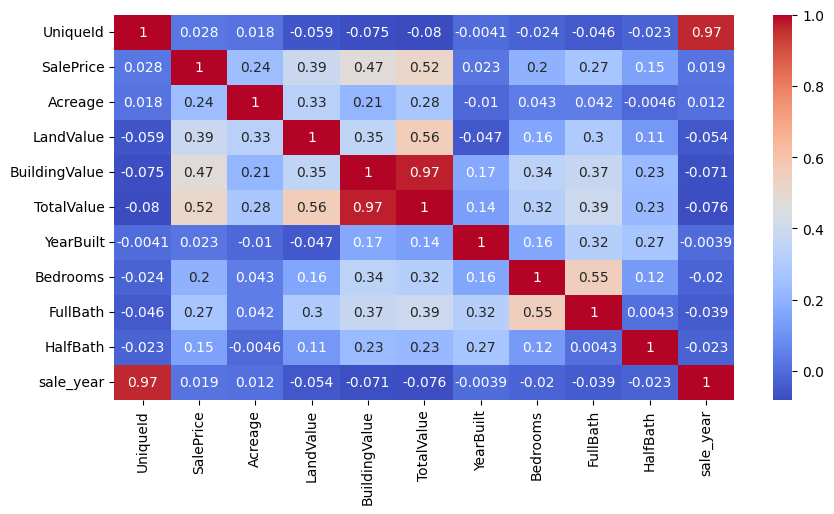

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm')

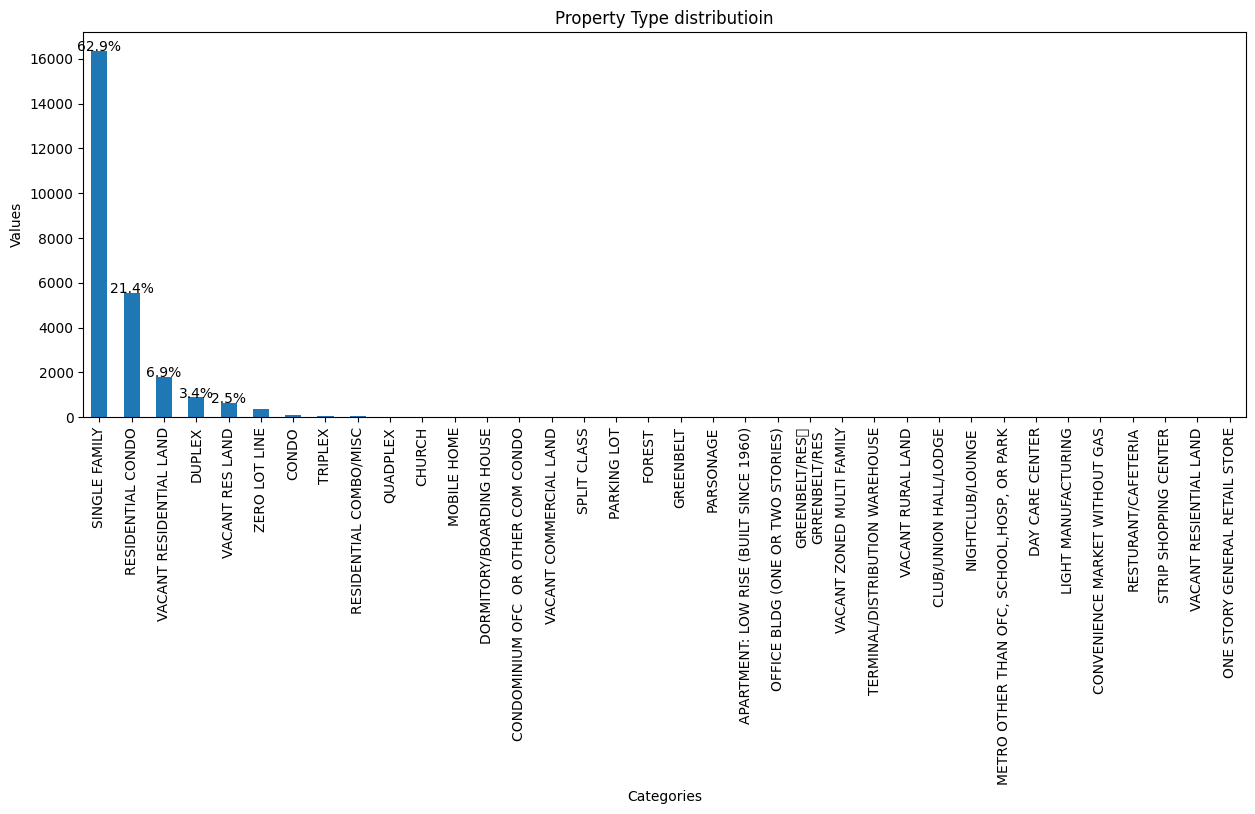

In [ ]:
# visuallization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
landuse_counts=df['LandUse'].value_counts()
landuse_perc = landuse_counts / landuse_counts.sum() * 100
ax = landuse_counts.plot(kind='bar')
# Add percentages on top of bars
for i, (count, perc) in enumerate(zip(landuse_counts, landuse_perc)):
    if i < 5:  # Only top 5
        ax.text(i, count + 0.5, f"{perc:.1f}%", ha='center', fontsize=10, color='black')
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Property Type distributioin')
# Show graph
plt.show()

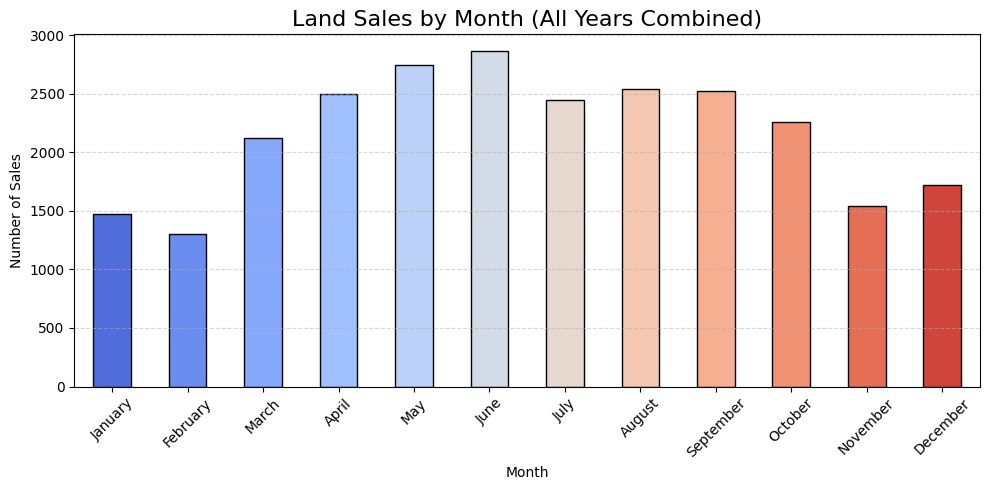

In [ ]:
# Make sure your date column is datetime
import seaborn as sns
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'], errors='coerce')
df['sale_month'] = df['SaleDateConverted'].dt.month_name()

# Count sales per month and sort
sales_per_month = df['sale_month'].value_counts().reindex(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
)

# Set a cool color palette
colors = sns.color_palette("coolwarm", 12)  # 12 months

# Plot
plt.figure(figsize=(10,5))
sales_per_month.plot(kind='bar', color=colors, edgecolor='black')

plt.title("Land Sales by Month (All Years Combined)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



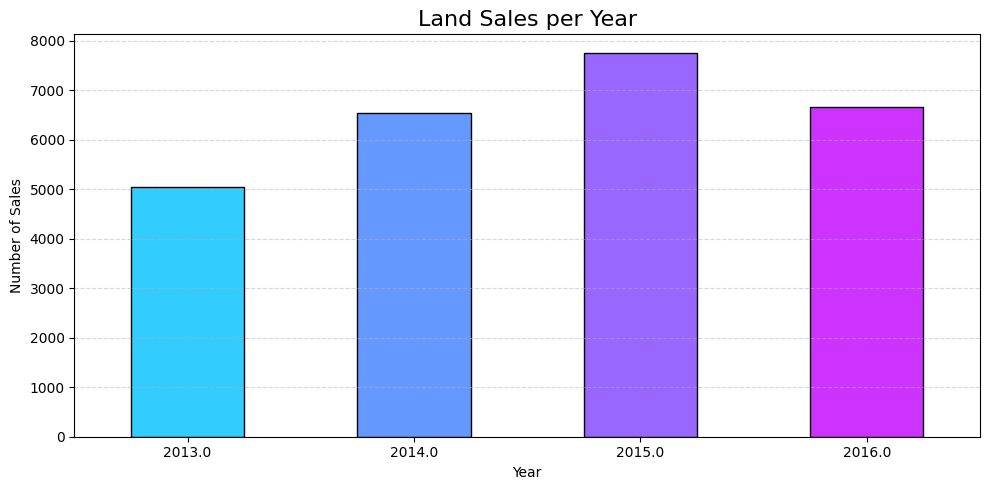

In [ ]:
# Ensure datetime
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'], errors='coerce')

# Extract year
df['sale_year'] = df['SaleDateConverted'].dt.year

# Count sales per year
sales_per_year = df['sale_year'].value_counts().sort_index()

# Plot with a cool color palette
colors = sns.color_palette("cool", len(sales_per_year))

plt.figure(figsize=(10,5))
sales_per_year.plot(kind='bar', color=colors, edgecolor='black')

plt.title("Land Sales per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

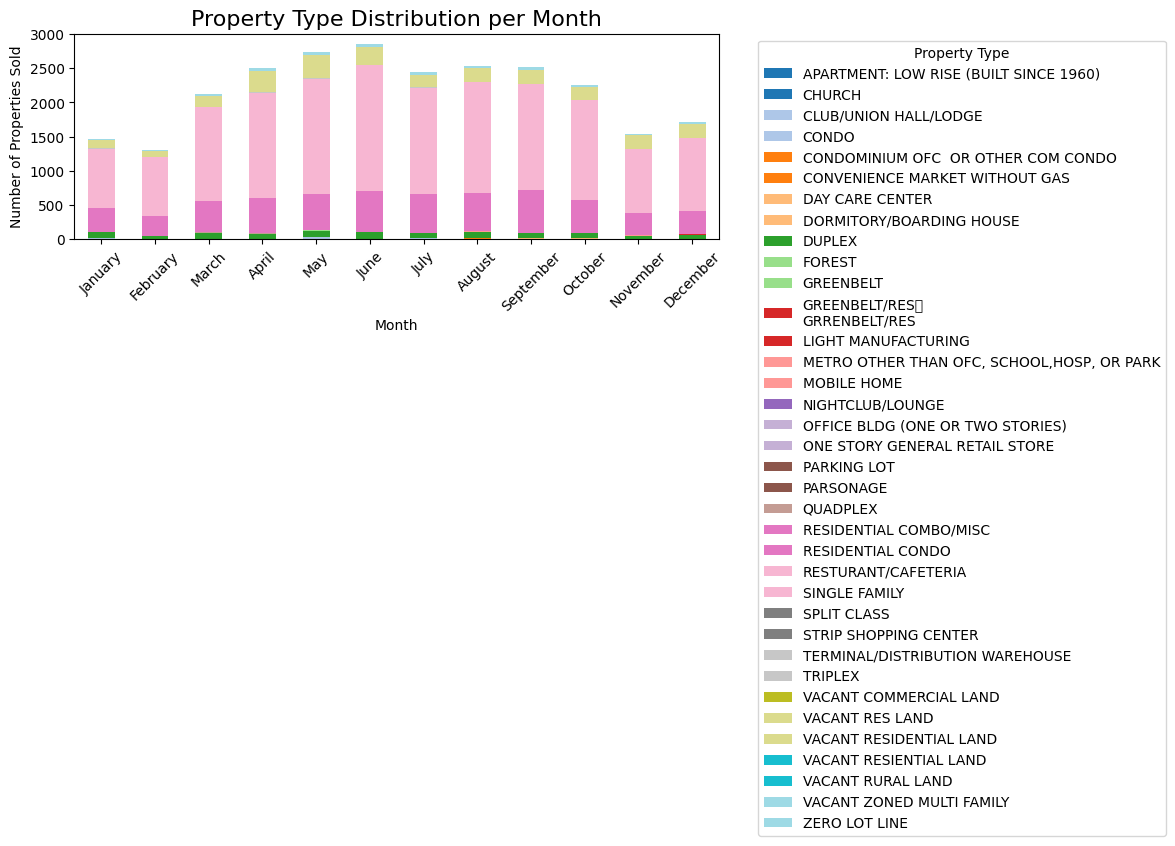

In [ ]:
# Ensure datetime
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'], errors='coerce')

# Extract month
df['sale_month'] = df['SaleDateConverted'].dt.month_name()

# Define month order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Create a cross-tab of property type counts per month
month_property_counts = pd.crosstab(df['sale_month'], df['LandUse'])  # Replace 'PropertyType' with your column name

# Reorder months
month_property_counts = month_property_counts.reindex(month_order)

# Plot stacked bar chart
month_property_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("Property Type Distribution per Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


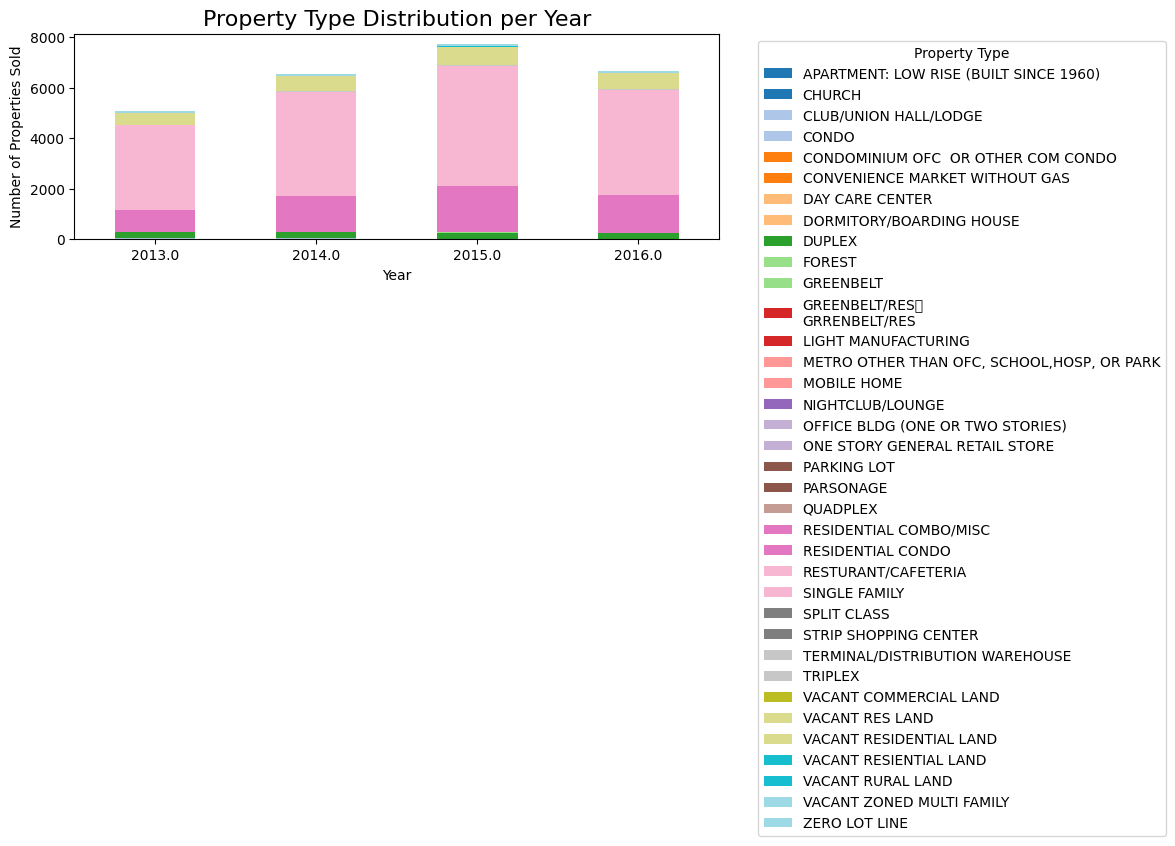

In [ ]:
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'], errors='coerce')

# Extract year
df['sale_year'] = df['SaleDateConverted'].dt.year

year_property_counts = pd.crosstab(df['sale_year'], df['LandUse'])  # Replace 'PropertyType' with your column name

# Plot stacked bar chart
year_property_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("Property Type Distribution per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=0)
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

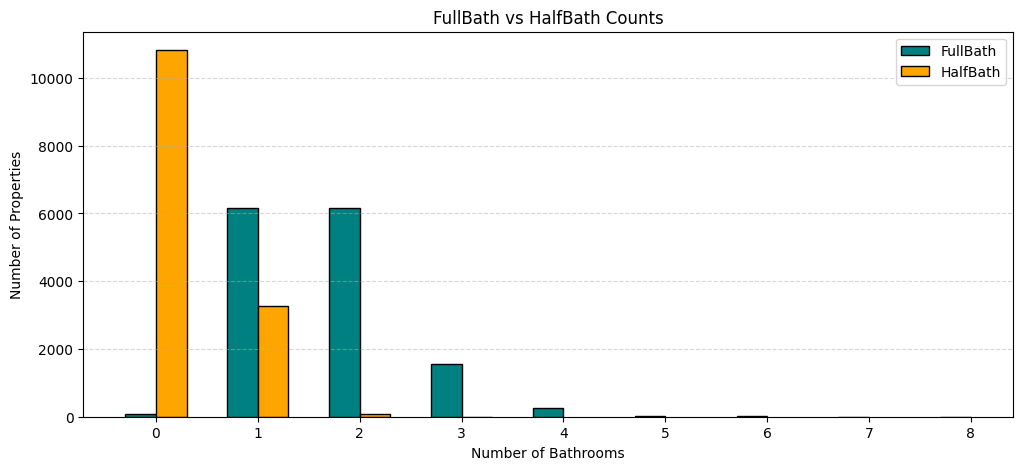

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Count of each FullBath value
fullbath_counts = df['FullBath'].value_counts().sort_index()

# Count of each HalfBath value
halfbath_counts = df['HalfBath'].value_counts().sort_index()

# Determine x-axis range safely
x_max = int(max(fullbath_counts.index.max(), halfbath_counts.index.max())) + 1

# Plot side-by-side
plt.figure(figsize=(12,5))
plt.bar(fullbath_counts.index - 0.15, fullbath_counts.values, width=0.3, label='FullBath', color='teal', edgecolor='black')
plt.bar(halfbath_counts.index + 0.15, halfbath_counts.values, width=0.3, label='HalfBath', color='orange', edgecolor='black')

plt.xlabel("Number of Bathrooms")
plt.ylabel("Number of Properties")
plt.title("FullBath vs HalfBath Counts")
plt.xticks(range(0, x_max))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


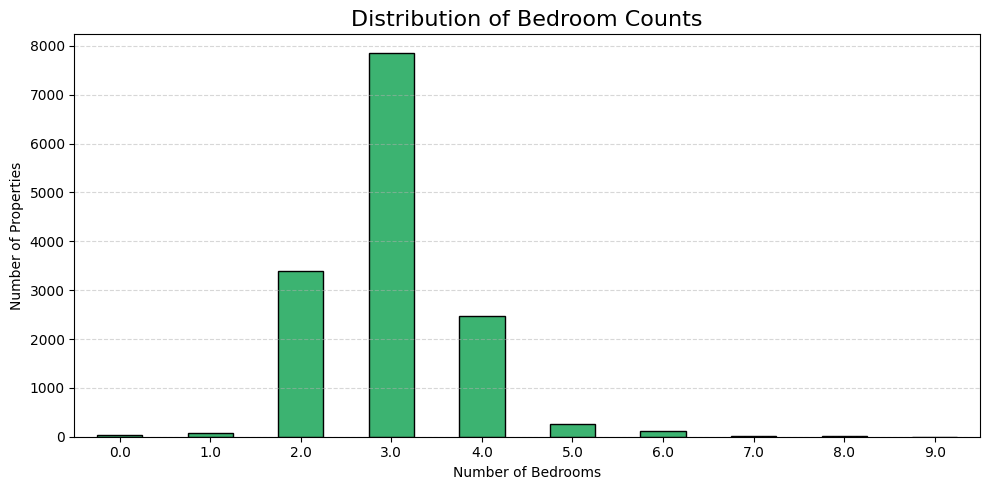

In [ ]:
# Count of each bedroom value
bedroom_counts = df['Bedrooms'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
bedroom_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title("Distribution of Bedroom Counts", fontsize=16)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Properties")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df['LandValue'].max()

2772000.0

In [ ]:
df['LandValue'].min()

100.0

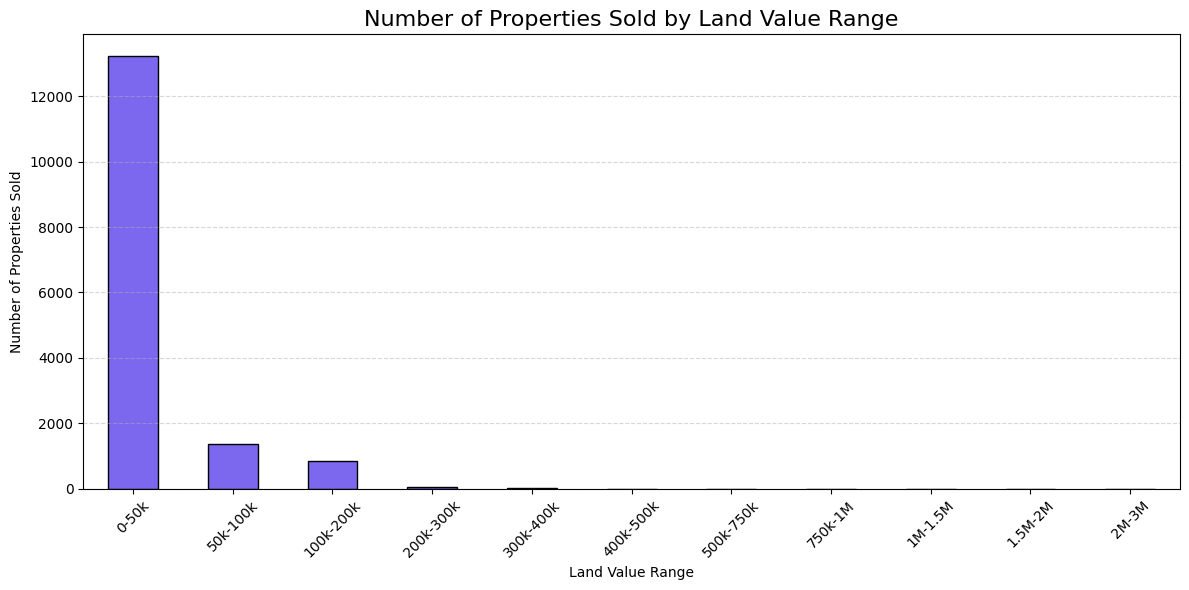

In [ ]:
# Ensure numeric
df['LandValue'] = pd.to_numeric(df['LandValue'], errors='coerce')

# Define bins for land value
bins = [0, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 1500000, 2000000, 3000000]
labels = ["0-50k","50k-100k","100k-200k","200k-300k","300k-400k","400k-500k",
          "500k-750k","750k-1M","1M-1.5M","1.5M-2M","2M-3M"]

# Bin land values
df['LandValueRange'] = pd.cut(df['LandValue'], bins=bins, labels=labels, include_lowest=True)

# Count properties per range
landvalue_counts = df['LandValueRange'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
landvalue_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Number of Properties Sold by Land Value Range", fontsize=16)
plt.xlabel("Land Value Range")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


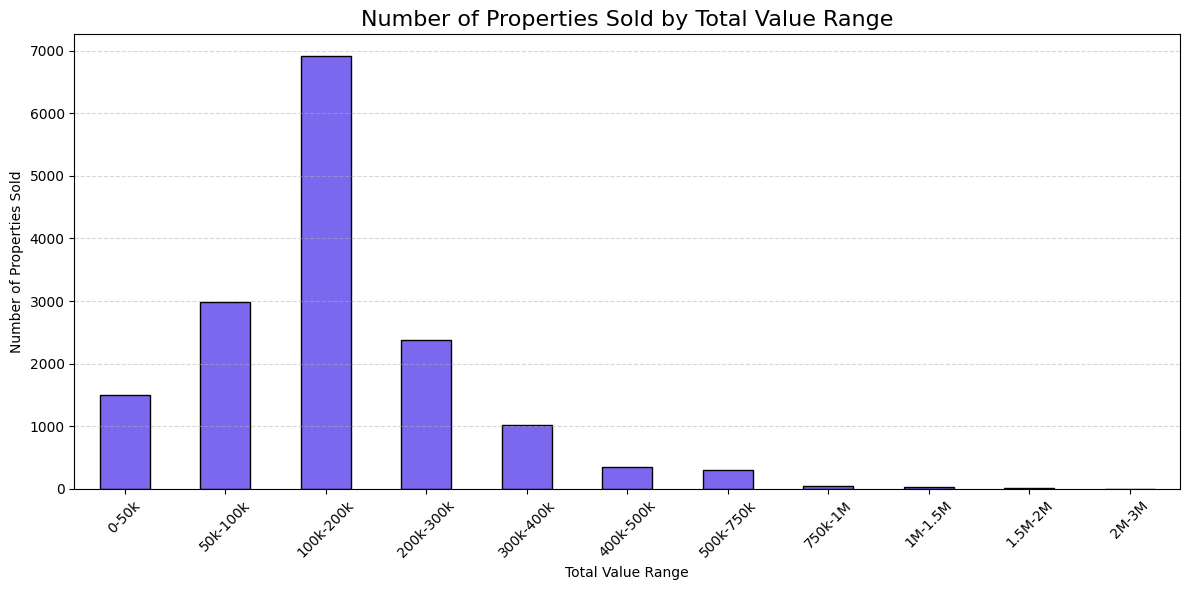

In [ ]:
# Ensure numeric
df['TotalValue'] = pd.to_numeric(df['TotalValue'], errors='coerce')

# Define bins for land value
bins = [0, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 1500000, 2000000, 3000000]
labels = ["0-50k","50k-100k","100k-200k","200k-300k","300k-400k","400k-500k",
          "500k-750k","750k-1M","1M-1.5M","1.5M-2M","2M-3M"]

# Bin land values
df['TotalValueRange'] = pd.cut(df['TotalValue'], bins=bins, labels=labels, include_lowest=True)

# Count properties per range
landvalue_counts = df['TotalValueRange'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
landvalue_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Number of Properties Sold by Total Value Range", fontsize=16)
plt.xlabel("Total Value Range")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


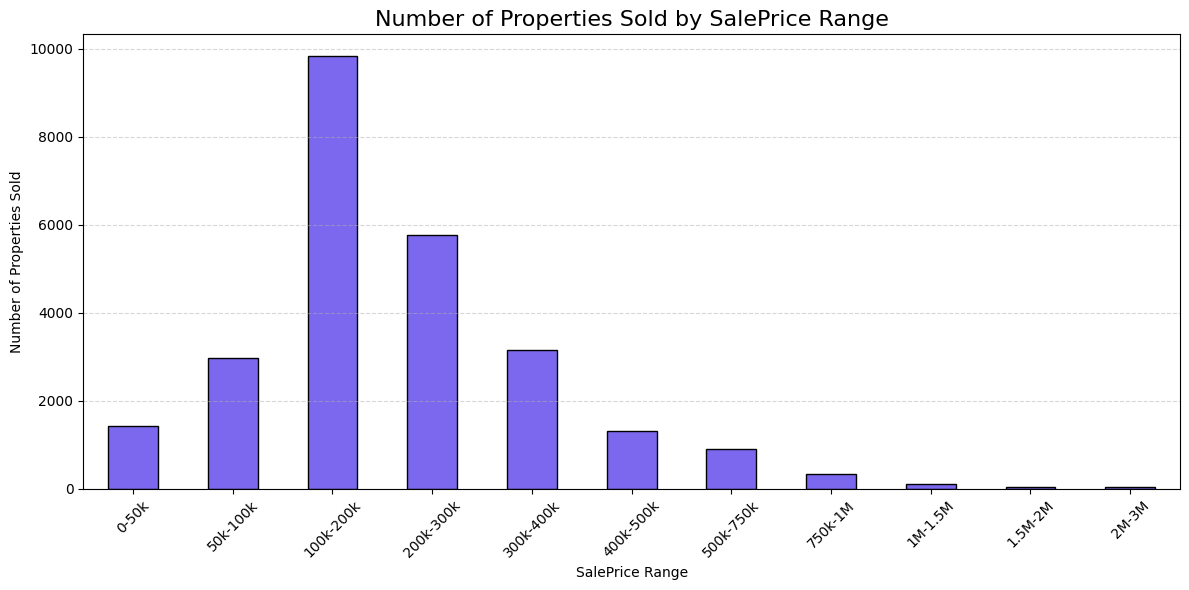

In [ ]:
# Ensure numeric
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')

# Define bins for land value
bins = [0, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 1500000, 2000000, 3000000]
labels = ["0-50k","50k-100k","100k-200k","200k-300k","300k-400k","400k-500k",
          "500k-750k","750k-1M","1M-1.5M","1.5M-2M","2M-3M"]

# Bin land values
df['SalePriceRange'] = pd.cut(df['SalePrice'], bins=bins, labels=labels, include_lowest=True)

# Count properties per range
landvalue_counts = df['SalePriceRange'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
landvalue_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Number of Properties Sold by SalePrice Range", fontsize=16)
plt.xlabel("SalePrice Range")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

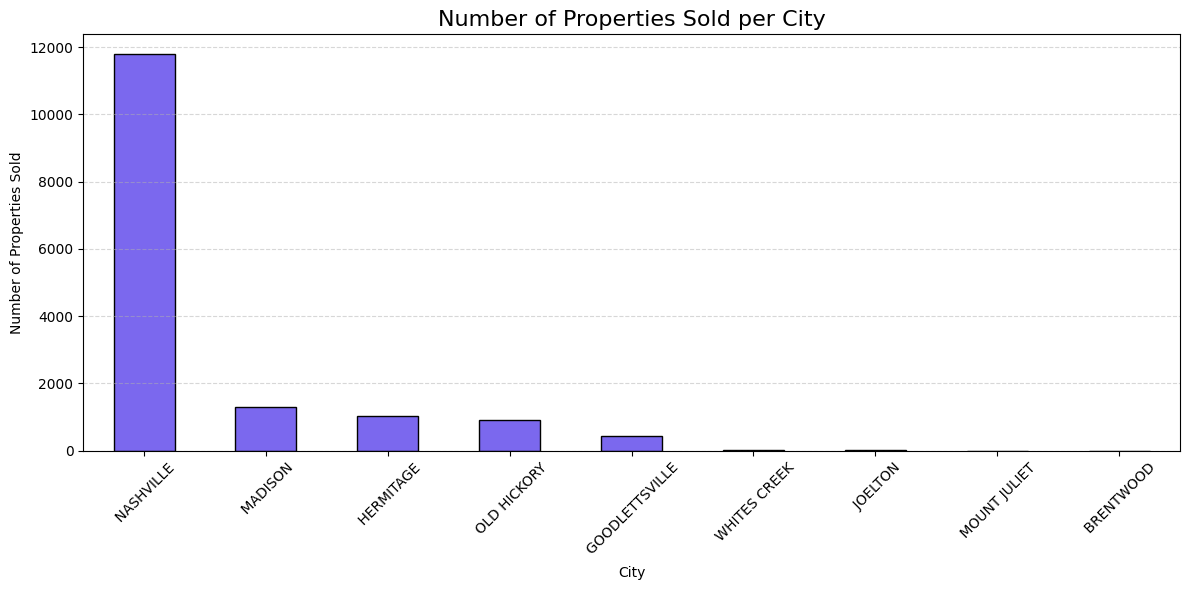

In [ ]:
# Count properties per city
city_counts = df['OwnerSplitCity'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
city_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Number of Properties Sold per City", fontsize=16)
plt.xlabel("City")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


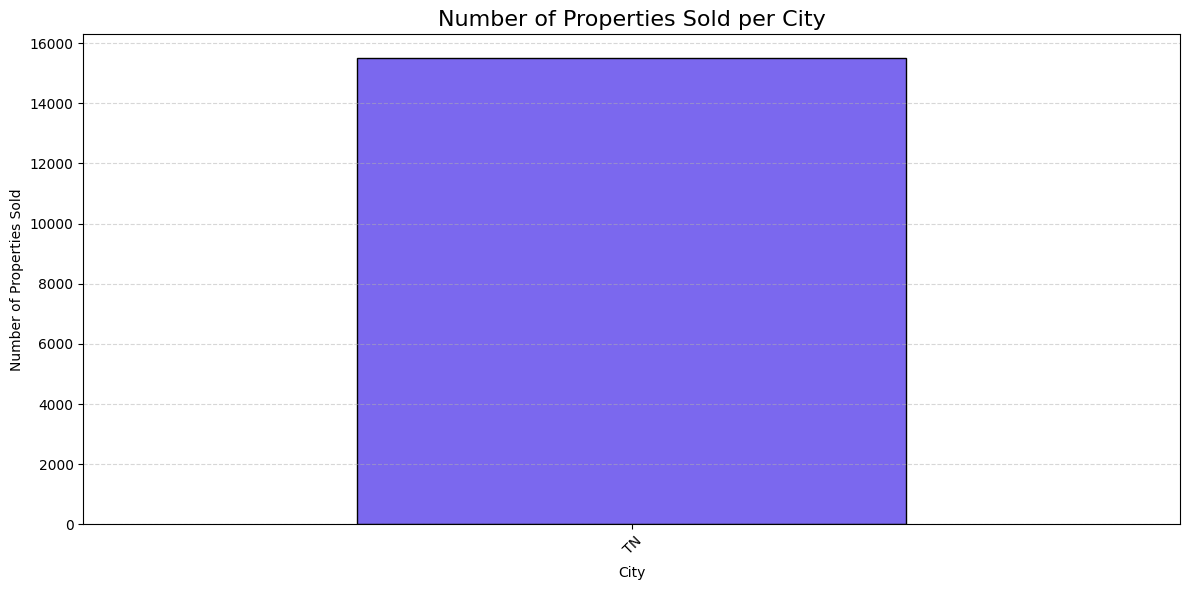

In [ ]:
# Count properties per city
city_counts = df['OwnerSplitState'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
city_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Number of Properties Sold per City", fontsize=16)
plt.xlabel("City")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df['SoldAsVacant'].value_counts()

,count
SoldAsVacant,
No,23954
Yes,2053


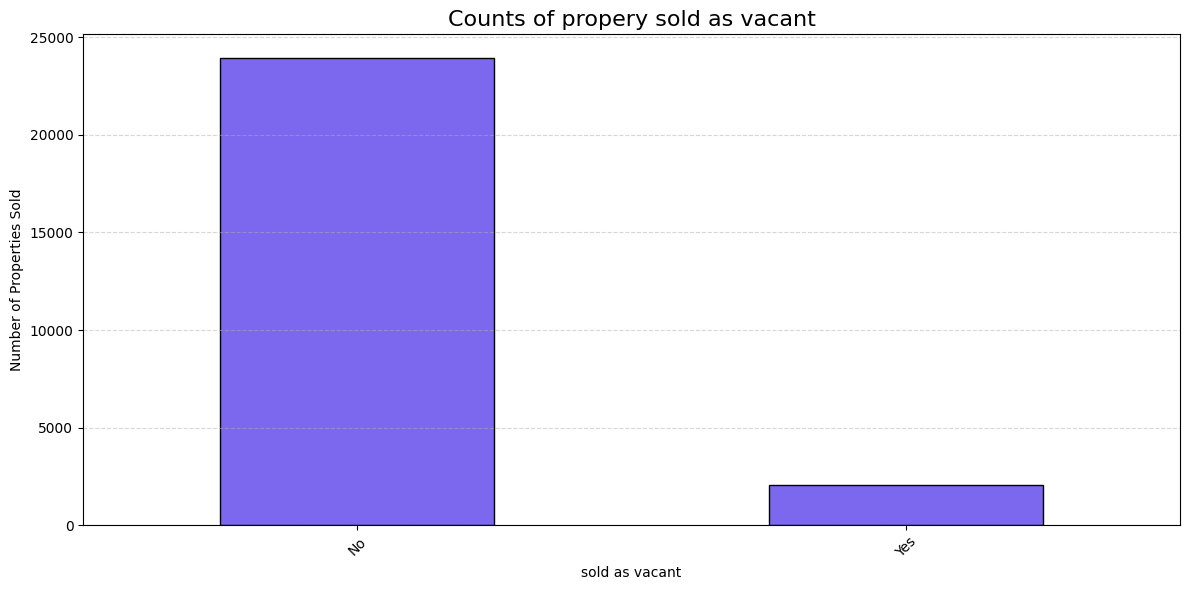

In [ ]:
sold_as_vacant_count=df['SoldAsVacant'].value_counts()
# Plot
plt.figure(figsize=(12,6))
sold_as_vacant_count.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title("Counts of propery sold as vacant", fontsize=16)
plt.xlabel("sold as vacant")
plt.ylabel("Number of Properties Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [61]:
# housing data forecasting
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [62]:
DATA_PATH = "housingds.csv"   # update if your file has a different name
DATE_COL = "SaleDateConverted"
PRICE_COL = "SalePrice"
AGG_FREQUENCY = "M"        # 'M' = month, 'W' = week, 'D' = day (choose aggregation level)
FORECAST_PERIODS = 12      # months to forecast

In [63]:
df = pd.read_csv("housingds.csv")  # replace with your path

# Convert SaleDateConverted to datetime
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'])

# Convert SalePrice to numeric (remove $ or commas if needed)
df['SalePrice'] = df['SalePrice'].replace('[\$,]', '', regex=True).astype(float)

# Aggregate monthly median sale price
df_ts = df.groupby(pd.Grouper(key='SaleDateConverted', freq='M'))['SalePrice'].median()
df_ts = df_ts.sort_index()
df_ts = df_ts.fillna(method='ffill')  # fill missing months

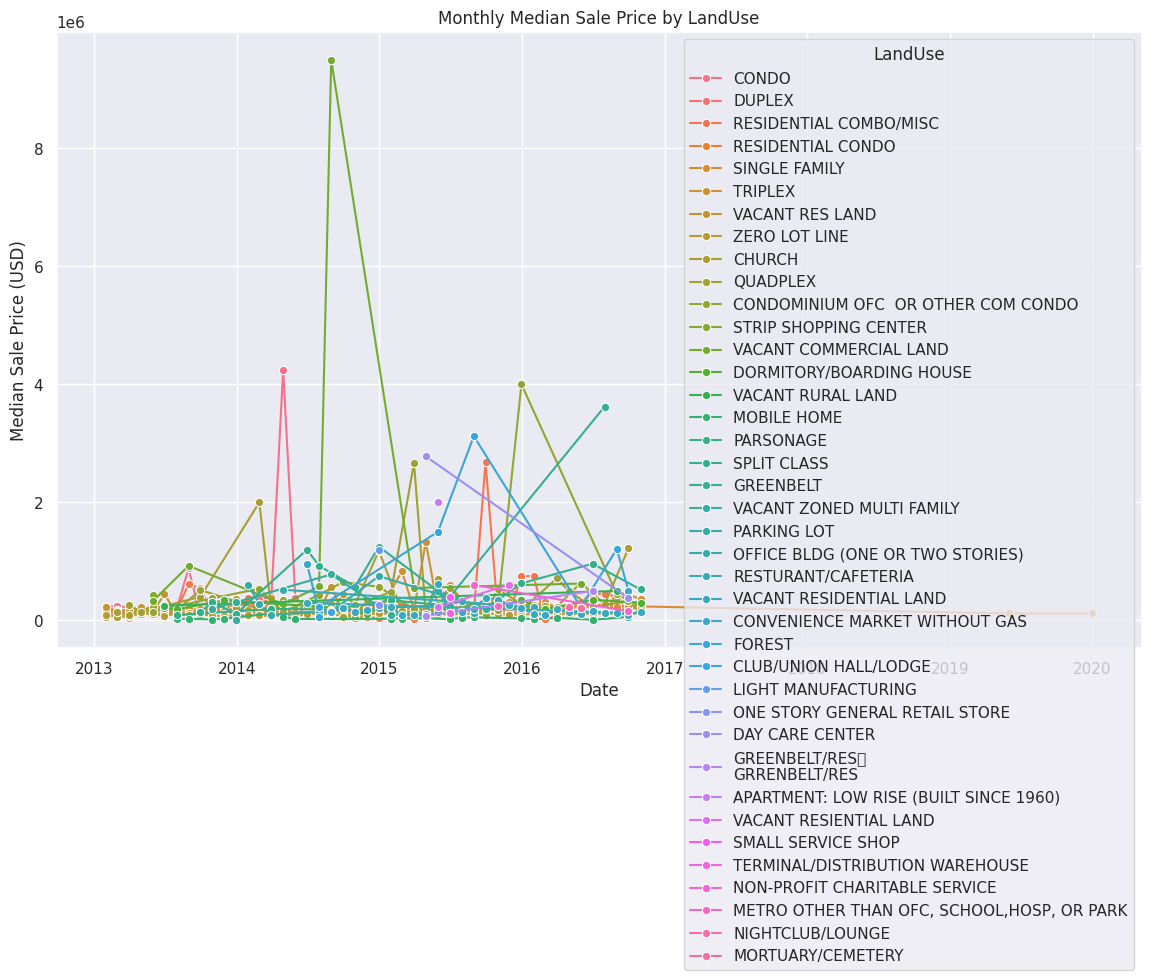

In [68]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure dates are datetime
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'])

# Convert SalePrice to numeric if not already
df['SalePrice'] = df['SalePrice'].replace('[\$,]', '', regex=True).astype(float)

# Optional: aggregate monthly median sale price by category (e.g., LandUse)
by_category = df.groupby([pd.Grouper(key='SaleDateConverted', freq='M'), 'LandUse'])['SalePrice'].median().reset_index()

# Set Seaborn figure size
sns.set(rc={'figure.figsize':(14,8)})

# Line plot: SalePrice over time by LandUse
ax = sns.lineplot(data=by_category,
                  x='SaleDateConverted',
                  y='SalePrice',
                  hue='LandUse',       # each LandUse gets a separate line
                  marker='o')

# Labels and title
plt.ylabel('Median Sale Price (USD)')
plt.xlabel('Date')
plt.title('Monthly Median Sale Price by LandUse')
plt.legend(title='LandUse')
plt.grid(True)
plt.show()



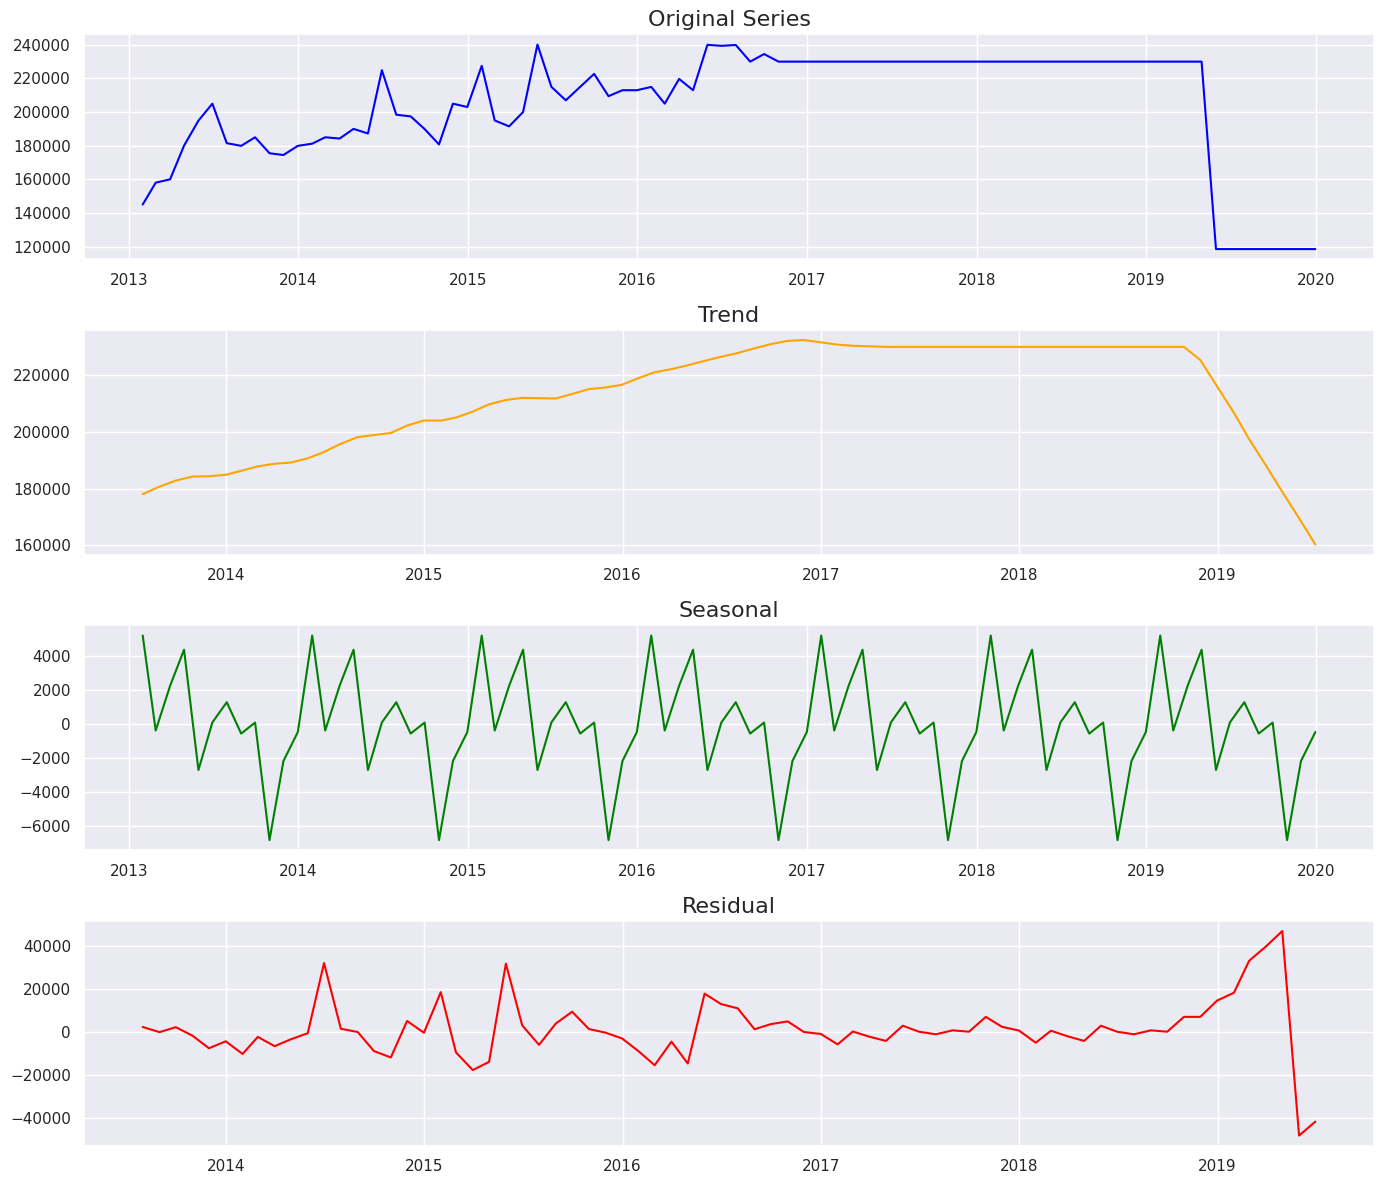

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure date column is datetime
df['SaleDateConverted'] = pd.to_datetime(df['SaleDateConverted'])

# Convert SalePrice to numeric
df['SalePrice'] = df['SalePrice'].replace('[\$,]', '', regex=True).astype(float)

# Aggregate monthly median sale price
df_monthly = df.groupby(pd.Grouper(key='SaleDateConverted', freq='M'))['SalePrice'].median()
df_monthly = df_monthly.fillna(method='ffill')  # fill missing months

# Seasonal decomposition (multiplicative or additive)
result = seasonal_decompose(df_monthly, model='additive', period=12)  # period=12 for monthly seasonality

trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Plot decomposition
plt.figure(figsize=(14,12))

plt.subplot(4,1,1)
plt.plot(df_monthly, label='Original', color='blue')
plt.title('Original Series', fontsize=16)
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend', fontsize=16)
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal', fontsize=16)
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(resid, label='Residual', color='red')
plt.title('Residual', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

SARIMAX MAE: 78680.43, RMSE: 95574.45


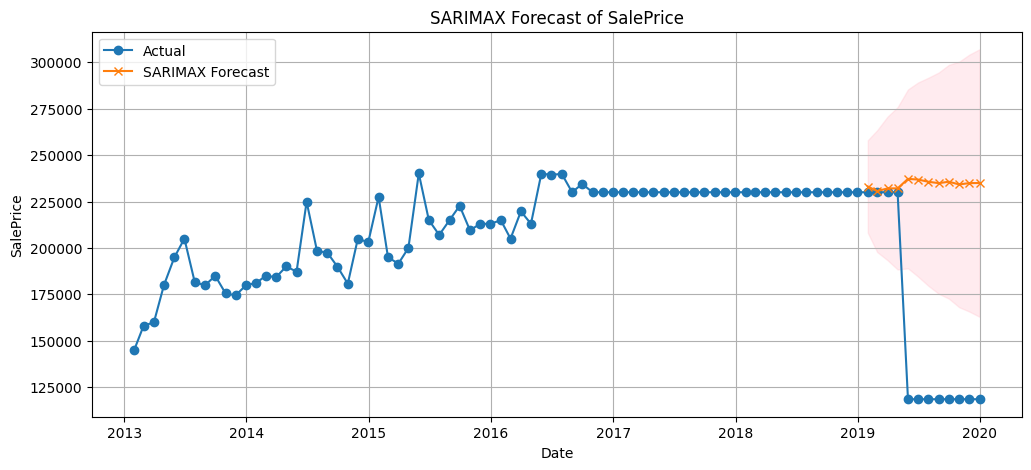

In [64]:
# Split train/test (last 12 months as test)
train = df_ts.iloc[:-12]
test  = df_ts.iloc[-12:]

# Fit SARIMAX (seasonal monthly)
sarimax_model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12))
sarimax_res = sarimax_model.fit(disp=False)

# Forecast
sar_forecast = sarimax_res.get_forecast(steps=len(test))
sar_pred = sar_forecast.predicted_mean
sar_conf = sar_forecast.conf_int()

# Evaluate
mae = mean_absolute_error(test, sar_pred)
rmse = np.sqrt(mean_squared_error(test, sar_pred))
print(f"SARIMAX MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_ts, label='Actual', marker='o')
plt.plot(sar_pred.index, sar_pred, label='SARIMAX Forecast', marker='x')
plt.fill_between(sar_conf.index, sar_conf.iloc[:,0], sar_conf.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMAX Forecast of SalePrice")
plt.xlabel("Date")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()


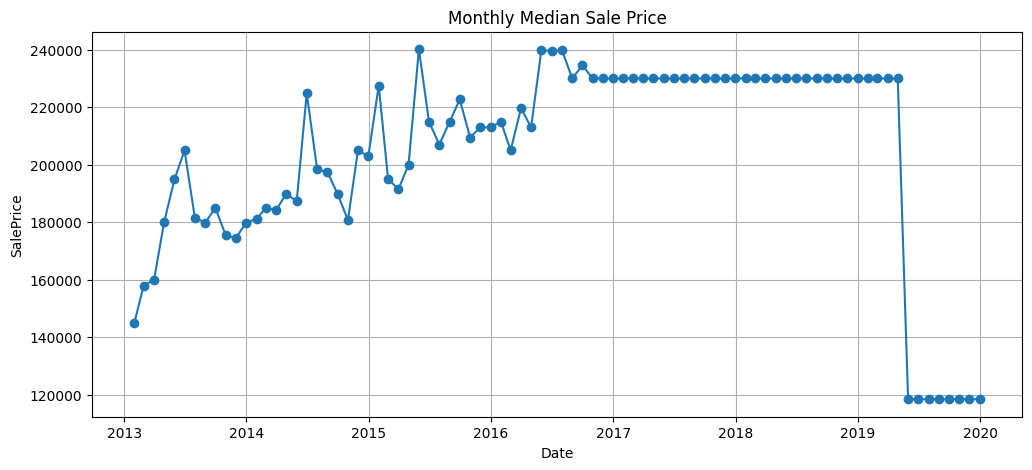

In [65]:
plt.figure(figsize=(12,5))
plt.plot(df_ts, marker='o')
plt.title("Monthly Median Sale Price")
plt.xlabel("Date")
plt.ylabel("SalePrice")
plt.grid(True)
plt.show()


SARIMAX MAE: 78680.43, RMSE: 95574.45


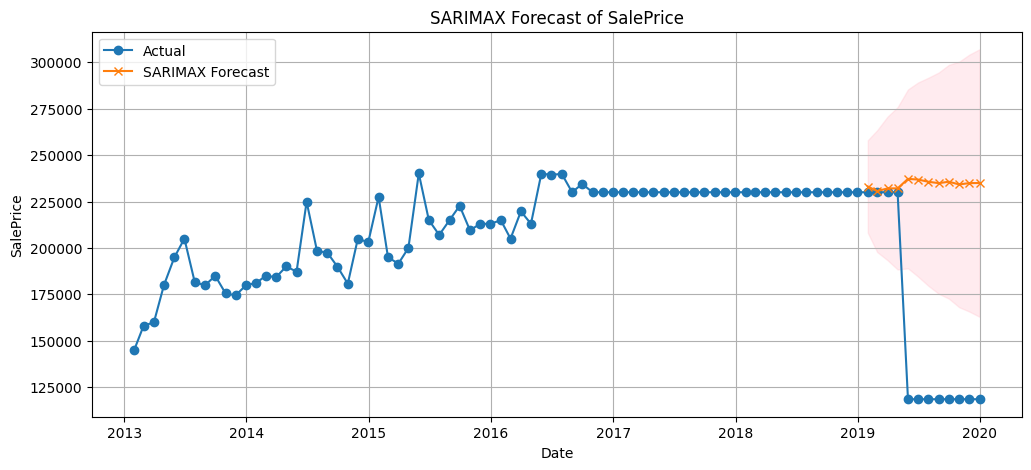

In [66]:
# Split train/test (last 12 months as test)
train = df_ts.iloc[:-12]
test  = df_ts.iloc[-12:]

# Fit SARIMAX (seasonal monthly)
sarimax_model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12))
sarimax_res = sarimax_model.fit(disp=False)

# Forecast
sar_forecast = sarimax_res.get_forecast(steps=len(test))
sar_pred = sar_forecast.predicted_mean
sar_conf = sar_forecast.conf_int()

# Evaluate
mae = mean_absolute_error(test, sar_pred)
rmse = np.sqrt(mean_squared_error(test, sar_pred))
print(f"SARIMAX MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_ts, label='Actual', marker='o')
plt.plot(sar_pred.index, sar_pred, label='SARIMAX Forecast', marker='x')
plt.fill_between(sar_conf.index, sar_conf.iloc[:,0], sar_conf.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMAX Forecast of SalePrice")
plt.xlabel("Date")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()


RandomForest MAE: 69296.69, RMSE: 85014.03


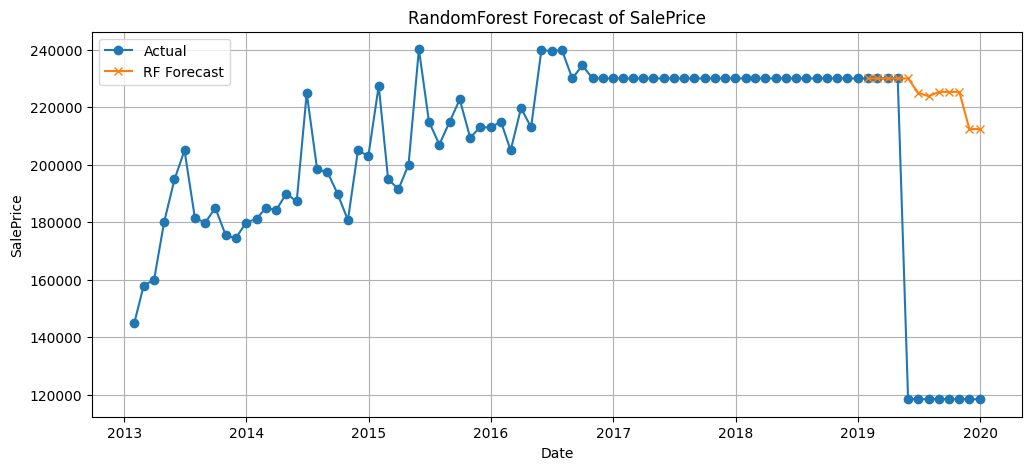

In [67]:
# Create lag features
lags = [1,2,3,6,12]
df_lags = pd.DataFrame(df_ts)
for lag in lags:
    df_lags[f"lag_{lag}"] = df_lags['SalePrice'].shift(lag)

df_lags = df_lags.dropna()

X = df_lags.drop(columns=['SalePrice'])
y = df_lags['SalePrice']

# Split train/test aligned with SARIMAX
X_train = X.iloc[:-12]
y_train = y.iloc[:-12]
X_test  = X.iloc[-12:]
y_test  = y.iloc[-12:]

# Train RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"RandomForest MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_ts, label='Actual', marker='o')
plt.plot(y_test.index, rf_pred, label='RF Forecast', marker='x')
plt.title("RandomForest Forecast of SalePrice")
plt.xlabel("Date")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()
